In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


# Data preparation

In [2]:
# Let's us read the input data
#dftest = pd.read_csv('../input/dataset/test.csv')
dftest = pd.read_csv('../input/dataset10/test10.csv')

dftest['descripcion'] = dftest['descripcion'].apply(lambda x: x.strip('"'))

dftest.pop('Unnamed: 0')

dftest.head()


,descripcion,03,09,14,15,16,18,19,22,24,...,73,75,76,77,79,80,85,90,92,98
0,Servicio de consultoria implantación de una of...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Reforma integral del sistema de ACS de vestuar...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Sº. de vigilancia de la Salud, reconocimiento ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Acondicionamiento de local para oficinas comar...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Soporte para la verificación del grado de adec...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_test = dftest.drop('descripcion', axis=1)
y_test.shape

(3104, 45)

In [4]:
X_test = dftest['descripcion']
X_test

0       Servicio de consultoria implantación de una of...
1       Reforma integral del sistema de ACS de vestuar...
2       Sº. de vigilancia de la Salud, reconocimiento ...
3       Acondicionamiento de local para oficinas comar...
4       Soporte para la verificación del grado de adec...
                              ...                        
3099    Servicio de instalación y mantenimiento de la ...
3100    Campamentos urbanos y de Multiaventura, ofreci...
3101    Servicio de mantenimiento de los equipos elect...
3102    Servicio de mantenimiento de instalaciones y e...
3103    Realización de reconocimientos médicos laboral...
Name: descripcion, Length: 3104, dtype: object

In [5]:
y_test

,03,09,14,15,16,18,19,22,24,30,...,73,75,76,77,79,80,85,90,92,98
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dftrain = pd.read_csv('../input/dataset10/train10.csv')

dftrain.pop('Unnamed: 0')
y_train = dftrain.drop('descripcion', axis=1)

from collections import Counter

#sorted_dict = dict( sorted(Counter([item for sublist in y_train for item in sublist]).items(),
                           #key=lambda item: item[1],
                           #reverse=True))
        
sorted_dict = y_train.apply(pd.value_counts)
sorted_dict = dict( sorted(sorted_dict.iloc[1].items(),
                           key=lambda item: item[1],
                           reverse=True))

print(sorted_dict)

{'45': 1630, '50': 613, '79': 540, '71': 435, '72': 358, '34': 354, '85': 341, '90': 335, '92': 333, '33': 215, '44': 203, '55': 201, '30': 189, '48': 186, '39': 174, '31': 154, '60': 143, '09': 142, '80': 139, '42': 131, '66': 124, '35': 118, '98': 113, '32': 96, '38': 92, '77': 84, '18': 78, '15': 74, '64': 69, '63': 67, '70': 66, '03': 57, '22': 50, '37': 48, '24': 42, '51': 37, '14': 32, '75': 31, '73': 30, '43': 29, '65': 20, '16': 15, '19': 15, '41': 4, '76': 1}


In [7]:
dftrain

,descripcion,03,09,14,15,16,18,19,22,24,...,73,75,76,77,79,80,85,90,92,98
0,"""Subministración de postos de traballo informa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""Suministro e instalación de elementos de acce...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""Prórroga del contrato derivado del Acuerdo ma...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,"""Ejecución del Programa de Intervención Comuni...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,"""Lote 1 Guante blanco uniformidad, Lote 2 guan...",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,"""Suministro, montaje y retirada de neumáticos ...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7239,"""Servicio Parametrización de los modulos de Fo...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7240,"""Servicio de instalación y mantenimiento de ap...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7241,"""Servicios de asistencia para el cumplimiento ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
from collections import Counter

#sorted_dicttest = dict( sorted(Counter([item for sublist in y_test for item in sublist]).items(),
#                           key=lambda item: item[1],
#                           reverse=True))

sorted_dicttest = y_test.apply(pd.value_counts)
sorted_dicttest = dict( sorted(sorted_dicttest.iloc[1].items(),
                           key=lambda item: item[1],
                           reverse=True))

print(sorted_dicttest)

{'45': 738.0, '76': nan, '79': 230.0, '50': 216.0, '85': 173.0, '71': 160.0, '72': 159.0, '34': 151.0, '90': 134.0, '92': 130.0, '44': 92.0, '55': 92.0, '30': 88.0, '33': 86.0, '60': 71.0, '39': 68.0, '09': 67.0, '42': 66.0, '80': 63.0, '48': 62.0, '31': 57.0, '35': 52.0, '77': 48.0, '98': 48.0, '32': 41.0, '66': 41.0, '64': 38.0, '15': 37.0, '38': 36.0, '18': 35.0, '24': 33.0, '63': 30.0, '03': 28.0, '70': 25.0, '22': 22.0, '37': 20.0, '73': 20.0, '51': 14.0, '75': 12.0, '14': 9.0, '43': 9.0, '65': 7.0, '16': 6.0, '19': 4.0, '41': 4.0}


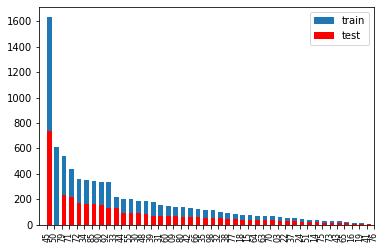

In [9]:
import matplotlib.pyplot as plt

x_pos=range(40,46*40,40)
bars = list(sorted_dict.keys())
height = sorted_dict.values()

plt.bar(x_pos, height, align='edge', width=25)
plt.bar(x_pos, sorted_dicttest.values(), color='r', align='edge', width=25)

plt.xlim(0,1500)

#plt.gca().axes.get_xaxis().set_visible(False)

plt.xticks(rotation='vertical',fontsize=8)

plt.legend(['train', 'test'],loc=1)

plt.xticks(x_pos, bars)
plt.savefig('plot.pdf')

plt.show()

# Transformers


In [10]:
!pip install transformers

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("MKaan/multilingual-cpv-sector-classifier")

model = AutoModelForSequenceClassification.from_pretrained("MKaan/multilingual-cpv-sector-classifier")

Downloading:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/679M [00:00<?, ?B/s]

In [12]:
import torch

input = torch.tensor([tokenizer.encode("Limpieza y conserjería CEIP M.Padin Truiteiro")])

In [13]:
input = tokenizer("Limpieza y conserjería CEIP M.Padin Truiteiro", return_tensors="pt")

In [14]:
outputs = model(**input)
print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.5148,  1.8985,  7.2012,  0.6925,  0.9177,  1.3554, -1.6155, -1.4910,
         -1.1884, -1.7870,  1.2117, -0.6364, -2.2123, -0.9165, -1.3307, -1.0661,
          1.3584,  0.5021, -0.1842, -1.3182, -1.4674, -1.9008, -0.2543, -0.8937,
         -2.1957, -1.2282, -2.6009, -2.4250,  3.7182, -1.3873, -0.8201, -1.4229,
         -0.0609, -2.3954,  2.0106,  0.6915,  3.3459, -0.5597, -2.5821, -0.1936,
          6.9916, -2.1307,  0.7631, -1.0228,  0.8883]],
       grad_fn=<AddmmBackward>), hidden_states=None, attentions=None)


In [15]:
logits = outputs.logits

import torch.nn.functional as F 

sm = F.softmax(logits, dim=1)
sm = sm.detach().numpy()[0]

print(list(sm))

[0.0017836058, 0.0026176595, 0.5258297, 0.00078376336, 0.0009816448, 0.0015207805, 7.7948316e-05, 8.828583e-05, 0.000119484794, 6.566386e-05, 0.0013172509, 0.00020751476, 4.2914915e-05, 0.00015681704, 0.000103631544, 0.00013502072, 0.0015253319, 0.000647885, 0.0003261591, 0.000104932646, 9.0391535e-05, 5.8603386e-05, 0.0003040775, 0.00016042733, 4.3636188e-05, 0.00011481965, 2.9098393e-05, 3.4694676e-05, 0.016151082, 9.792931e-05, 0.00017269181, 9.450511e-05, 0.0003689366, 3.5735153e-05, 0.0029282405, 0.00078291766, 0.011130989, 0.0002240465, 2.9648774e-05, 0.00032310697, 0.4264065, 4.6567624e-05, 0.0008410903, 0.00014100652, 0.0009532497]


In [16]:
import numpy as np

sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)] = 1
predictions
probs

tensor([0.8198, 0.8697, 0.9993, 0.6665, 0.7146, 0.7950, 0.1658, 0.1838, 0.2335,
        0.1434, 0.7706, 0.3461, 0.0986, 0.2857, 0.2090, 0.2561, 0.7955, 0.6230,
        0.4541, 0.2111, 0.1873, 0.1300, 0.4368, 0.2903, 0.1001, 0.2265, 0.0691,
        0.0813, 0.9763, 0.1998, 0.3058, 0.1942, 0.4848, 0.0835, 0.8819, 0.6663,
        0.9660, 0.3636, 0.0703, 0.4518, 0.9991, 0.1062, 0.6820, 0.2645, 0.7085],
       grad_fn=<SigmoidBackward>)

In [17]:
y_test.iloc[0]

03    0
09    0
14    0
15    0
16    0
18    0
19    0
22    0
24    0
30    0
31    0
32    0
33    0
34    0
35    0
37    0
38    0
39    0
41    0
42    0
43    0
44    0
45    0
48    0
50    0
51    0
55    0
60    0
63    0
64    0
65    0
66    0
70    0
71    0
72    1
73    0
75    0
76    0
77    0
79    0
80    0
85    0
90    0
92    0
98    0
Name: 0, dtype: int64

In [18]:
clases = ["75","16","3","77","71","79","24","18","41","44","45","80","31","66","15","39","85","55","42","51","72","38","19","43","33","14","37","30","98","9","64","22","65","32","70","92","50","73","35","76","90","48","63","34","60"]

# Evaluation


In [19]:
ypred = []

row = X_test.iloc[0]
input = torch.tensor([tokenizer.encode(row)])
outputs = model(input)
logits = outputs.logits
sm = F.softmax(logits, dim=1)
sm = sm.detach().numpy()[0]
ypred.append(sm)
#list(sm)

#row = X_test.iloc[1]
#input = torch.tensor([tokenizer.encode(row)])
#outputs = model(input)
#logits = outputs.logits
#sm = F.softmax(logits, dim=1)
#sm = sm.detach().numpy()[0]
#ypred.append(sm)

print(ypred)

[array([2.67060776e-03, 1.55167399e-05, 4.72867323e-05, 1.61917214e-05,
       5.96244168e-03, 7.90072680e-02, 1.22768943e-05, 2.79920241e-05,
       1.42296085e-05, 1.44713467e-05, 8.03357034e-05, 1.58141227e-03,
       6.69759247e-05, 3.21837084e-04, 3.50497467e-05, 3.71090209e-05,
       2.30490766e-03, 4.40965123e-05, 8.57902467e-01, 5.78225990e-05,
       4.00173594e-04, 4.58681898e-04, 1.03664170e-05, 8.52038647e-06,
       1.63705190e-04, 8.63014247e-06, 7.97538360e-06, 1.08217797e-03,
       1.77102676e-03, 2.36717588e-05, 1.55866635e-03, 2.13309104e-04,
       1.23500839e-04, 6.86979678e-04, 1.60013195e-04, 7.59537274e-04,
       3.93792026e-04, 2.94404496e-02, 8.64315225e-05, 5.61640190e-05,
       1.21170910e-04, 1.20277274e-02, 1.11463742e-04, 3.53206342e-05,
       7.01516256e-05], dtype=float32)]


In [20]:
X_test

0       Servicio de consultoria implantación de una of...
1       Reforma integral del sistema de ACS de vestuar...
2       Sº. de vigilancia de la Salud, reconocimiento ...
3       Acondicionamiento de local para oficinas comar...
4       Soporte para la verificación del grado de adec...
                              ...                        
3099    Servicio de instalación y mantenimiento de la ...
3100    Campamentos urbanos y de Multiaventura, ofreci...
3101    Servicio de mantenimiento de los equipos elect...
3102    Servicio de mantenimiento de instalaciones y e...
3103    Realización de reconocimientos médicos laboral...
Name: descripcion, Length: 3104, dtype: object

In [21]:
import numpy as np
ypred_softmax5 = []
ypred_softmax01 = []
ypred_softmax3 = []
ypred_softmax05 = []
ypred_softmax1 = []

ypred_sigmoid5 = []
ypred_sigmoid7 = []
ypred_sigmoid8 = []
ypred_sigmoid9 = []
ypred_sigmoid95 = []

sigmoid = torch.nn.Sigmoid()
i=0
# softmax
for row in X_test:
  i = i + 1
  input = torch.tensor([tokenizer.encode(row)])
  outputs = model(input)
  logits = outputs.logits
  
  sm = F.softmax(logits, dim=1)
  sm = sm.detach().numpy()[0]
  predictions = np.zeros(45)
  predictions[np.where(sm >= 0.5)] = 1
  ypred_softmax5.append(predictions)
  predictions = np.zeros(45)
  predictions[np.where(sm >= 0.1)] = 1
  ypred_softmax1.append(predictions)
  predictions = np.zeros(45)
  predictions[np.where(sm >= 0.05)] = 1
  ypred_softmax05.append(predictions)
  predictions = np.zeros(45)
  predictions[np.where(sm >= 0.01)] = 1
  ypred_softmax01.append(predictions)
  predictions = np.zeros(45)
  predictions[np.where(sm >= 0.3)] = 1
  ypred_softmax3.append(predictions)

  probs = sigmoid(logits.squeeze().cpu())
  predictions = np.zeros(probs.shape)
  predictions[np.where(probs >= 0.5)] = 1
  ypred_sigmoid5.append(predictions)
  predictions = np.zeros(probs.shape)
  predictions[np.where(probs >= 0.7)] = 1
  ypred_sigmoid7.append(predictions)
  predictions = np.zeros(probs.shape)
  predictions[np.where(probs >= 0.8)] = 1
  ypred_sigmoid8.append(predictions)
  predictions = np.zeros(probs.shape)
  predictions[np.where(probs >= 0.9)] = 1
  ypred_sigmoid9.append(predictions)
  predictions = np.zeros(probs.shape)
  predictions[np.where(probs >= 0.95)] = 1
  ypred_sigmoid95.append(predictions)
  if(i%100==0):
     print(i, '/31042')

ypred_softmax5 = np.array(ypred_softmax5)
ypred_softmax3 = np.array(ypred_softmax3)
ypred_softmax1 = np.array(ypred_softmax1)
ypred_softmax05 = np.array(ypred_softmax05)
ypred_softmax01 = np.array(ypred_softmax01)
ypred_sigmoid5 = np.array(ypred_sigmoid5)
ypred_sigmoid7 = np.array(ypred_sigmoid7)
ypred_sigmoid8 = np.array(ypred_sigmoid8)
ypred_sigmoid9 = np.array(ypred_sigmoid9)
ypred_sigmoid95 = np.array(ypred_sigmoid95)

100 /31042
200 /31042
300 /31042
400 /31042
500 /31042
600 /31042
700 /31042
800 /31042
900 /31042
1000 /31042
1100 /31042
1200 /31042
1300 /31042
1400 /31042
1500 /31042
1600 /31042
1700 /31042
1800 /31042
1900 /31042
2000 /31042
2100 /31042
2200 /31042
2300 /31042
2400 /31042
2500 /31042
2600 /31042
2700 /31042
2800 /31042
2900 /31042
3000 /31042
3100 /31042


We reorder the columns so they correspond to the ones by the MKaan model (that were in alphabetical order in English).

In [22]:
ypred_softmax5 = ypred_softmax5[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_softmax3 = ypred_softmax3[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_softmax1 = ypred_softmax1[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_softmax05 = ypred_softmax05[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_softmax01 = ypred_softmax01[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_sigmoid5 = ypred_sigmoid5[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_sigmoid7 = ypred_sigmoid7[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_sigmoid8 = ypred_sigmoid8[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_sigmoid9 = ypred_sigmoid9[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]
ypred_sigmoid95 = ypred_sigmoid95[:, [2,29,25,14,1,7,22,31,6,27,12,33,24,43,38,26,21,15,8,18,23,9,10,41,36,19,17,44,42,30,32,13,34,4,20,37,0,39,3,5,11,16,40,35,28]]

print('done!')

done!


In [23]:
ypred_softmax5

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
ypred_softmax3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
ypred_softmax1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
ypred_softmax05

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
ypred_softmax01

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
ypred_sigmoid5

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [29]:
ypred_sigmoid7

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
ypred_sigmoid8

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
ypred_sigmoid9

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [32]:
y_test

,03,09,14,15,16,18,19,22,24,30,...,73,75,76,77,79,80,85,90,92,98
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(ytest,y_pred):
    # finally, compute metrics
    y_true = ytest
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    coverage_err = coverage_error(y_test, y_pred)
    label_ranking_average_precision = label_ranking_average_precision_score(y_test, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy,
               'coverage_error': coverage_err,
               'label_ranking_average_precision_score': label_ranking_average_precision}
    return metrics

In [34]:
# softmax
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score

print(f'mkaan softmax01:')	
print(multi_label_metrics(y_test, ypred_softmax01))
print(f'mkaan softmax05:')	
print(multi_label_metrics(y_test, ypred_softmax05))
print(f'mkaan softmax1:')	
print(multi_label_metrics(y_test, ypred_softmax1))
print(f'mkaan softmax3:')	
print(multi_label_metrics(y_test, ypred_softmax3))
print(f'mkaan softmax5:')	
print(multi_label_metrics(y_test, ypred_softmax5))

mkaan softmax01:
{'f1': 0.3739384116693679, 'roc_auc': 0.8763068511972499, 'accuracy': 0.24677835051546393, 'coverage_error': 11.05090206185567, 'label_ranking_average_precision_score': 0.437372161008736}
mkaan softmax05:
{'f1': 0.5539080703240838, 'roc_auc': 0.8591012976131323, 'accuracy': 0.43073453608247425, 'coverage_error': 12.47583762886598, 'label_ranking_average_precision_score': 0.5887068263566251}
mkaan softmax1:
{'f1': 0.6095705521472392, 'roc_auc': 0.8447673390166294, 'accuracy': 0.5096649484536082, 'coverage_error': 13.639175257731958, 'label_ranking_average_precision_score': 0.634794306137723}
mkaan softmax3:
{'f1': 0.6535444723989936, 'roc_auc': 0.8096869084826369, 'accuracy': 0.6095360824742269, 'coverage_error': 16.629832474226806, 'label_ranking_average_precision_score': 0.6634970297099686}
mkaan softmax5:
{'f1': 0.6535293167501212, 'roc_auc': 0.7848225316849927, 'accuracy': 0.5976159793814433, 'coverage_error': 18.704896907216494, 'label_ranking_average_precision_sco

In [35]:
# sigmoid
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score

print(f'mkaan sigmoid5:')	
print(multi_label_metrics(y_test, ypred_sigmoid5))
print(f'mkaan sigmoid7:')	
print(multi_label_metrics(y_test, ypred_sigmoid7))
print(f'mkaan sigmoid8:')	
print(multi_label_metrics(y_test, ypred_sigmoid8))
print(f'mkaan sigmoid9:')	
print(multi_label_metrics(y_test, ypred_sigmoid9))
print(f'mkaan sigmoid95:')	
print(multi_label_metrics(y_test, ypred_sigmoid95))

mkaan sigmoid5:
{'f1': 0.1275078536049492, 'roc_auc': 0.8041610229202355, 'accuracy': 0.0, 'coverage_error': 17.383698453608247, 'label_ranking_average_precision_score': 0.07050076964808946}
mkaan sigmoid7:
{'f1': 0.1871137526242645, 'roc_auc': 0.8495386835511494, 'accuracy': 0.0, 'coverage_error': 13.305090206185566, 'label_ranking_average_precision_score': 0.11076625959441773}
mkaan sigmoid8:
{'f1': 0.23450290150263245, 'roc_auc': 0.8617175524086119, 'accuracy': 0.0, 'coverage_error': 12.2097293814433, 'label_ranking_average_precision_score': 0.14719043316780178}
mkaan sigmoid9:
{'f1': 0.32355881372875717, 'roc_auc': 0.8710523646831483, 'accuracy': 0.006121134020618557, 'coverage_error': 11.493878865979381, 'label_ranking_average_precision_score': 0.22734927854934545}
mkaan sigmoid95:
{'f1': 0.4165602224058907, 'roc_auc': 0.8677658919303917, 'accuracy': 0.06443298969072164, 'coverage_error': 11.639819587628866, 'label_ranking_average_precision_score': 0.33622612675126184}


In [36]:
y_test

,03,09,14,15,16,18,19,22,24,30,...,73,75,76,77,79,80,85,90,92,98
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
